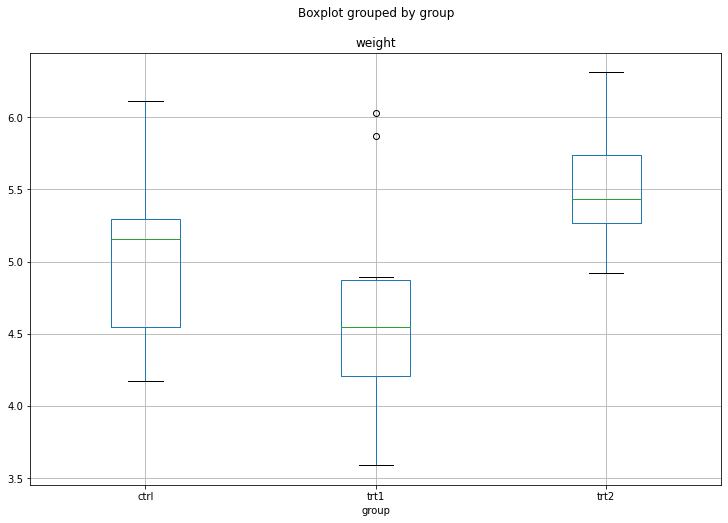

In [41]:
import pandas as pd

datafile = "/Users/shionguha/Documents/GitHub/inf2178h-w22-exp-design-datascience/data/PlantGrowth.csv"
data = pd.read_csv(datafile)

#Create a boxplot
data.boxplot('weight', by='group', figsize=(12, 8))

ctrl = data['weight'][data.group == 'ctrl']

grps = pd.unique(data.group.values)
d_data = {grp:data['weight'][data.group == grp] for grp in grps}

k = len(pd.unique(data.group))  # number of conditions
N = len(data.values)  # conditions times participants
n = data.groupby('group').size()[0] #Participants in each condition

In [42]:
from scipy import stats

F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])

In [43]:
DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

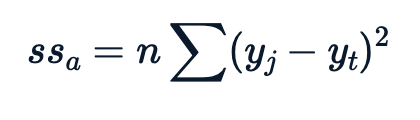

In [44]:
SSbetween = (sum(data.groupby('group').sum()['weight']**2)/n) \
    - (data['weight'].sum()**2)/N

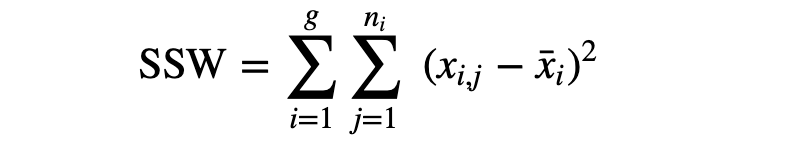

In [45]:
#calculate within sum of squares
sum_y_squared = sum([value**2 for value in data['weight'].values])
SSwithin = sum_y_squared - sum(data.groupby('group').sum()['weight']**2)/n

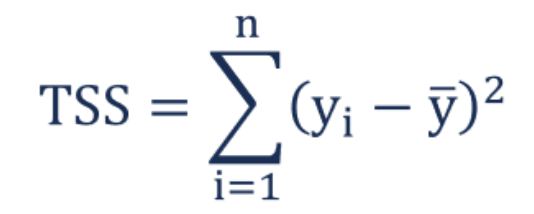

In [46]:
#calculate total sum of squares
SStotal = sum_y_squared - (data['weight'].sum()**2)/N

In [47]:
#calculate mean square within and between
MSbetween = SSbetween/DFbetween
MSwithin = SSwithin/DFwithin

In [48]:
#calculate F test
F = MSbetween/MSwithin

In [49]:
#calculate p value
p = stats.f.sf(F, DFbetween, DFwithin)

In [50]:
#calculate effect size (eta squared)
eta_sqrd = SSbetween/SStotal

In [51]:
#calculate omega squared
om_sqrd = (SSbetween - (DFbetween * MSwithin))/(SStotal + MSwithin)

In [52]:
#easy way to do this
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('weight ~ group',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


In [53]:
#post hoc corrections (Bonferroni)
pair_t = mod.t_test_pairwise('group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
trt1-ctrl,-0.371,0.278782,-1.330791,0.194388,-0.943013,0.201013,0.194388,False
trt2-ctrl,0.494,0.278782,1.771996,0.087682,-0.078013,1.066013,0.167675,False
trt2-trt1,0.865,0.278782,3.102787,0.004459,0.292987,1.437013,0.013318,True


In [54]:
import pandas as pd
import pingouin as pg

In [55]:
#anova
data = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv"
df = pd.read_csv(data, index_col=0)
aov = pg.anova(data=df, dv='weight', between='group', detailed=True)
print(aov)

   Source        SS  DF        MS         F    p-unc       np2
0   group   3.76634   2  1.883170  4.846088  0.01591  0.264148
1  Within  10.49209  27  0.388596       NaN      NaN       NaN


In [57]:
#pairwise comparisons
pt = pg.pairwise_tukey(dv='weight', between='group', effsize = 'cohen', data=df)
print(pt)

      A     B  mean(A)  mean(B)   diff        se         T   p-tukey     cohen
0  ctrl  trt1    5.032    4.661  0.371  0.278782  1.330791  0.392139  0.595148
1  ctrl  trt2    5.032    5.526 -0.494  0.278782 -1.771996  0.198036 -0.792461
2  trt1  trt2    4.661    5.526 -0.865  0.278782 -3.102787  0.011993 -1.387609
